In [93]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [94]:
# Import csv paths for each file.
aapl_path = Path('/Users/erahm/Downloads/aapl_historical.csv')
algo_path = Path('/Users/erahm/Downloads/algo_returns.csv')
cost_path = Path('/Users/erahm/Downloads/cost_historical.csv')
goog_path = Path('/Users/erahm/Downloads/goog_historical.csv')
sp500_path = Path('/Users/erahm/Downloads/sp500_history.csv')
whale_path = Path('/Users/erahm/Downloads/whale_returns.csv')

In [95]:
# View a sample of the data for AAPL Historical.
aapl_path = pd.read_csv('/Users/erahm/Downloads/aapl_historical.csv')
aapl_path.sample(5)

,Symbol,Trade DATE,NOCP
89,AAPL,12/31/2018,157.74
77,AAPL,1/17/2019,155.86
230,AAPL,6/8/2018,191.70
197,AAPL,7/26/2018,194.21
87,AAPL,1/3/2019,142.19


In [96]:
# View the data types for each column for AAPL Historical.
aapl_path = pd.read_csv('/Users/erahm/Downloads/aapl_historical.csv')
aapl_path.dtypes

Symbol         object
Trade DATE     object
NOCP          float64
dtype: object

In [97]:
# Count the number of rows in each column for AAPL Historical.
aapl_path = pd.read_csv('/Users/erahm/Downloads/aapl_historical.csv')
aapl_path.count()

Symbol        250
Trade DATE    250
NOCP          250
dtype: int64

In [98]:
# Detect missing values by column and row for AAPL Historical.
aapl_path = pd.read_csv('/Users/erahm/Downloads/aapl_historical.csv')
aapl_path.isnull()

,Symbol,Trade DATE,NOCP
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
245,False,False,False
246,False,False,False
247,False,False,False
248,False,False,False


In [99]:
# Determine the percentage of nulls by column for AAPL Historical.
aapl_path = pd.read_csv('/Users/erahm/Downloads/aapl_historical.csv')
aapl_path.isnull().mean() * 100

Symbol        0.0
Trade DATE    0.0
NOCP          0.0
dtype: float64

In [100]:
# Find the total sum of nulls by column for AAPL Historical. There is not any null data based on this function, so we do not need to fill null values with a default value.
aapl_path = pd.read_csv('/Users/erahm/Downloads/aapl_historical.csv')
aapl_path.isnull().sum()

Symbol        0
Trade DATE    0
NOCP          0
dtype: int64

In [101]:
 # Check for the number of duplicates. 
aapl_path = aapl_path
aapl_path.duplicated().sum()

0

In [102]:
 # Identify if there are any numeric fields with $ symbol or characters. 
aapl_path.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [103]:
# Create new dataframe.
new_aapl_df = aapl_path[['Symbol', 'Trade DATE', 'NOCP']].copy()
new_aapl_df

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75
...,...,...,...
245,AAPL,5/17/2018,186.99
246,AAPL,5/16/2018,188.18
247,AAPL,5/15/2018,186.44
248,AAPL,5/14/2018,188.15


In [104]:
# Convert the 'Date' column from 'Object' to 'DateTime'.
new_aapl_df['Trade DATE'] = pd.to_datetime(new_aapl_df['Trade DATE'])
print(new_aapl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Symbol      250 non-null    object        
 1   Trade DATE  250 non-null    datetime64[ns]
 2   NOCP        250 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.0+ KB
None


In [105]:
# Create DateTimeIndex.
new_aapl_df.set_index(pd.to_datetime(new_aapl_df['Trade DATE'], infer_datetime_format=True), inplace=True)
new_aapl_df.head()

,Symbol,Trade DATE,NOCP
Trade DATE,,,
2019-05-09,AAPL,2019-05-09,200.72
2019-05-08,AAPL,2019-05-08,202.90
2019-05-07,AAPL,2019-05-07,202.86
2019-05-06,AAPL,2019-05-06,208.48
2019-05-03,AAPL,2019-05-03,211.75


In [106]:
# Rename the 'Trade DATE' index to 'Date' so that all Date columns use the same name.
new_aapl_df.index.names = ["Date"]
new_aapl_df.sample(5)

,Symbol,Trade DATE,NOCP
Date,,,
2018-11-13,AAPL,2018-11-13,192.23
2018-08-08,AAPL,2018-08-08,207.25
2018-08-20,AAPL,2018-08-20,215.46
2018-10-16,AAPL,2018-10-16,222.15
2018-06-25,AAPL,2018-06-25,182.17


In [107]:
# Sort Date index in ascending order and drop the 'Symbol' and extra 'Trade DATE' columns.
new_aapl_df.sort_index(ascending=True).drop(['Symbol','Trade DATE'], axis=1)

,NOCP
Date,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
...,...
2019-05-03,211.75
2019-05-06,208.48
2019-05-07,202.86


In [108]:
# View a sample of the data for Algo Returns.
algo_path = pd.read_csv('/Users/erahm/Downloads/algo_returns.csv')
algo_path.sample(5)

,Date,Algo 1,Algo 2
765,2017-06-09,0.012475,-0.000134
1133,2018-11-23,-0.004997,0.001175
764,2017-06-08,0.005482,0.007947
714,2017-03-28,0.008995,0.007678
424,2016-02-02,0.003568,-0.019519


In [109]:
# View the data types for each column for Algo Returns.
algo_path = pd.read_csv('/Users/erahm/Downloads/algo_returns.csv')
algo_path.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [110]:
# Count the number of rows in each column for Algo Returns.
algo_path = pd.read_csv('/Users/erahm/Downloads/algo_returns.csv')
algo_path.count()

Date      1241
Algo 1    1241
Algo 2    1235
dtype: int64

In [111]:
# Detect missing values by column and row for Algo Returns.
algo_path = pd.read_csv('/Users/erahm/Downloads/algo_returns.csv')
algo_path.isnull()

,Date,Algo 1,Algo 2
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1236,False,False,False
1237,False,False,False
1238,False,False,False
1239,False,False,False


In [112]:
# Determine the percentage of nulls by column for Algo Returns.
algo_path = pd.read_csv('/Users/erahm/Downloads/algo_returns.csv')
algo_path.isnull().mean() * 100

Date      0.000000
Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [113]:
# Find the total sum of nulls by column for Algo Returns.
algo_path = pd.read_csv('/Users/erahm/Downloads/algo_returns.csv')
algo_path.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [114]:
 # Check for the number of duplicates. 
algo_path = algo_path
algo_path.duplicated().sum()

0

In [115]:
 # Identify if there are any numeric fields with $ symbol or characters. 
algo_path.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [116]:
# Create new dataframe.
new_algo_df = algo_path[['Date', 'Algo 1', 'Algo 2']].copy()
new_algo_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [117]:
# Create DateTimeIndex.
new_algo_df.set_index(pd.to_datetime(new_algo_df['Date'], infer_datetime_format=True), inplace=True)
new_algo_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [118]:
 # Cleanse nulls from DataFrame by filling null data with the default value "Unknown."  Based on our previous isnull().sum() function, we see that only the 'Algo 2'
 # column has null values that need to be filled.  Given that we will be creating a combined dataframe and there is corresponding data in the 'Algo 1' column
 # for some of the rows that align with 'Algo 2', we will leave the null values in place so that we can analyze all available data in the analysis.
new_algo_df["Algo 2"] = new_algo_df["Algo 2"].fillna("0.00")
new_algo_df

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,0.00
2014-05-29,2014-05-29,0.003978,0.00
2014-05-30,2014-05-30,0.004464,0.00
2014-06-02,2014-06-02,0.005692,0.00
2014-06-03,2014-06-03,0.005292,0.00
...,...,...,...
2019-04-25,2019-04-25,0.000682,-0.007247
2019-04-26,2019-04-26,0.002981,0.005256
2019-04-29,2019-04-29,0.005208,0.002829


In [119]:
# Convert the 'Date' column from 'Object' to 'DateTime'.
new_algo_df['Date'] = pd.to_datetime(new_algo_df['Date'])
print(new_algo_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1241 non-null   datetime64[ns]
 1   Algo 1  1241 non-null   float64       
 2   Algo 2  1241 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 38.8+ KB
None


In [120]:
# Convert the 'Algo 2' column to 'Float'.
new_algo_df['Algo 2'] = new_algo_df['Algo 2'].astype(float, errors = 'raise')
print(new_algo_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1241 non-null   datetime64[ns]
 1   Algo 1  1241 non-null   float64       
 2   Algo 2  1241 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.8 KB
None


In [121]:
# Sort Date index in ascending order and drop the extra 'Date' column.
new_algo_df.sort_index(ascending=True).drop(['Date'], axis=1)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,0.000000
2014-05-29,0.003978,0.000000
2014-05-30,0.004464,0.000000
2014-06-02,0.005692,0.000000
2014-06-03,0.005292,0.000000
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [122]:
# Create new dataframe to calculate Algo 1 daily returns.
algo_1_data = new_algo_df
algo_1_data = algo_1_data.drop('Algo 2', 1)
algo_1_data = algo_1_data.drop('Date', 1)
algo_1_data = algo_1_data.pct_change()
algo_1_data

C:\Users\erahm\AppData\Local\Temp/ipykernel_37088/412523917.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  algo_1_data = algo_1_data.drop('Algo 2', 1)
C:\Users\erahm\AppData\Local\Temp/ipykernel_37088/412523917.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  algo_1_data = algo_1_data.drop('Date', 1)


,Algo 1
Date,
2014-05-28,NaN
2014-05-29,1.280156
2014-05-30,0.122192
2014-06-02,0.275137
2014-06-03,-0.070296
...,...
2019-04-25,-0.376856
2019-04-26,3.368191
2019-04-29,0.746958


<AxesSubplot:xlabel='Date'>

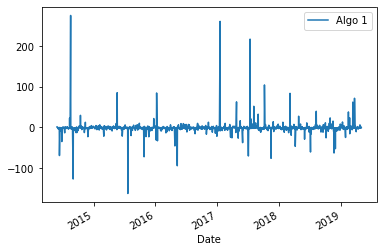

In [123]:
# Plot the daily returns for the Algo 1 portfolio.
algo_1_data.plot()

In [124]:
# Create new dataframe to calculate Algo 2 daily returns.
algo_2_data = new_algo_df
algo_2_data = algo_2_data.drop('Algo 1', 1)
algo_2_data = algo_2_data.drop('Date', 1)
algo_2_data = algo_2_data.pct_change()
algo_2_data

C:\Users\erahm\AppData\Local\Temp/ipykernel_37088/2119090597.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  algo_2_data = algo_2_data.drop('Algo 1', 1)
C:\Users\erahm\AppData\Local\Temp/ipykernel_37088/2119090597.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  algo_2_data = algo_2_data.drop('Date', 1)


,Algo 2
Date,
2014-05-28,NaN
2014-05-29,NaN
2014-05-30,NaN
2014-06-02,NaN
2014-06-03,NaN
...,...
2019-04-25,-19.155605
2019-04-26,-1.725170
2019-04-29,-0.461657


<AxesSubplot:xlabel='Date'>

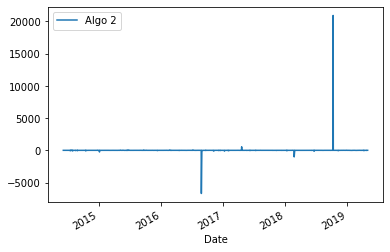

In [125]:
# Plot the daily returns for the Algo 2 portfolio.
algo_2_data.plot()

In [127]:
# View a sample of the data for Cost Historical.
cost_path = pd.read_csv('/Users/erahm/Downloads/cost_historical.csv')
cost_path.sample(5)

,Symbol,Trade DATE,NOCP
60,COST,2/12/2019,211.90
1,COST,5/8/2019,241.34
83,COST,1/9/2019,209.90
47,COST,3/4/2019,218.41
143,COST,10/11/2018,221.82


In [128]:
# View the data types for each column for Cost Historical.
cost_path = pd.read_csv('/Users/erahm/Downloads/cost_historical.csv')
cost_path.dtypes

Symbol         object
Trade DATE     object
NOCP          float64
dtype: object

In [129]:
# Count the number of rows in each column for Cost Historical.
cost_path = pd.read_csv('/Users/erahm/Downloads/cost_historical.csv')
cost_path.count()

Symbol        250
Trade DATE    250
NOCP          250
dtype: int64

In [130]:
# Detect missing values by column and row for Cost Historical.
cost_path = pd.read_csv('/Users/erahm/Downloads/cost_historical.csv')
cost_path.isnull()

,Symbol,Trade DATE,NOCP
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
245,False,False,False
246,False,False,False
247,False,False,False
248,False,False,False


In [131]:
# Determine the percentage of nulls by column for Cost Historical.
cost_path = pd.read_csv('/Users/erahm/Downloads/cost_historical.csv')
cost_path.isnull().mean() * 100

Symbol        0.0
Trade DATE    0.0
NOCP          0.0
dtype: float64

In [132]:
# Find the total sum of nulls by column for Cost Historical. There is not any null data based on this function, so we do not need to fill null values with a default value.
cost_path = pd.read_csv('/Users/erahm/Downloads/cost_historical.csv')
cost_path.isnull().sum()

Symbol        0
Trade DATE    0
NOCP          0
dtype: int64

In [133]:
 # Check for the number of duplicates. 
cost_path = cost_path
cost_path.duplicated().sum()

0

In [134]:
 # Identify if there are any numeric fields with $ symbol or characters.  
cost_path.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [135]:
# Create new dataframe.
new_cost_df = cost_path[['Symbol', 'Trade DATE', 'NOCP']].copy()
new_cost_df

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62
...,...,...,...
245,COST,5/17/2018,199.60
246,COST,5/16/2018,198.71
247,COST,5/15/2018,195.48
248,COST,5/14/2018,195.88


In [136]:
# Convert the 'Trade DATE' column from 'Object' to 'DateTime'.
new_cost_df['Trade DATE'] = pd.to_datetime(new_cost_df['Trade DATE'])
print(new_cost_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Symbol      250 non-null    object        
 1   Trade DATE  250 non-null    datetime64[ns]
 2   NOCP        250 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.0+ KB
None


In [137]:
# Create DateTimeIndex.
new_cost_df.set_index(pd.to_datetime(new_cost_df['Trade DATE'], infer_datetime_format=True), inplace=True)
new_cost_df.head()

,Symbol,Trade DATE,NOCP
Trade DATE,,,
2019-05-09,COST,2019-05-09,243.47
2019-05-08,COST,2019-05-08,241.34
2019-05-07,COST,2019-05-07,240.18
2019-05-06,COST,2019-05-06,244.23
2019-05-03,COST,2019-05-03,244.62


In [138]:
# Sort Date Index in Ascending Order and drop the 'Symbol' and extra 'Trade DATE' columns with the drop function.
new_cost_df.sort_index(ascending=True).drop(['Symbol','Trade DATE'], axis=1)

,NOCP
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
...,...
2019-05-03,244.62
2019-05-06,244.23
2019-05-07,240.18


In [139]:
# View a sample of the data for Google Historical.
goog_path = pd.read_csv('/Users/erahm/Downloads/goog_historical.csv')
goog_path.sample(5)

,Symbol,Trade DATE,NOCP
5,GOOG,5/2/2019,1162.61
240,GOOG,5/24/2018,1079.24
117,GOOG,11/16/2018,1061.49
34,GOOG,3/21/2019,1231.54
87,GOOG,1/3/2019,1016.06


In [140]:
# View the data types for each column for Google Historical.
goog_path = pd.read_csv('/Users/erahm/Downloads/goog_historical.csv')
goog_path.dtypes

Symbol         object
Trade DATE     object
NOCP          float64
dtype: object

In [141]:
# Count the number of rows in each column for Google Historical.
goog_path = pd.read_csv('/Users/erahm/Downloads/goog_historical.csv')
goog_path.count()

Symbol        250
Trade DATE    250
NOCP          250
dtype: int64

In [142]:
# Detect missing values by column and row for Google Historical.
goog_path = pd.read_csv('/Users/erahm/Downloads/goog_historical.csv')
goog_path.isnull()

,Symbol,Trade DATE,NOCP
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
245,False,False,False
246,False,False,False
247,False,False,False
248,False,False,False


In [143]:
# Determine the percentage of nulls by column for Google Historical.
goog_path = pd.read_csv('/Users/erahm/Downloads/goog_historical.csv')
goog_path.isnull().mean() * 100

Symbol        0.0
Trade DATE    0.0
NOCP          0.0
dtype: float64

In [144]:
# Find the total sum of nulls by column for Google Historical. There is not any null data based on this function, so we do not need to fill null values with a default value.
goog_path = pd.read_csv('/Users/erahm/Downloads/goog_historical.csv')
goog_path.isnull().sum()

Symbol        0
Trade DATE    0
NOCP          0
dtype: int64

In [145]:
 # Check for the number of duplicates. 
goog_path = goog_path
goog_path.duplicated().sum()

0

In [146]:
 # Identify if there are any numeric fields with $ symbol or characters. 
goog_path.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [147]:
# Create new dataframe.
new_goog_df = goog_path[['Symbol', 'Trade DATE', 'NOCP']].copy()
new_goog_df

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
...,...,...,...
245,GOOG,5/17/2018,1078.59
246,GOOG,5/16/2018,1081.77
247,GOOG,5/15/2018,1079.23
248,GOOG,5/14/2018,1100.20


In [148]:
# Convert the 'Trade DATE' column from 'Object' to 'DateTime'.
new_goog_df['Trade DATE'] = pd.to_datetime(new_goog_df['Trade DATE'])
print(new_goog_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Symbol      250 non-null    object        
 1   Trade DATE  250 non-null    datetime64[ns]
 2   NOCP        250 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.0+ KB
None


In [149]:
# Create DateTimeIndex.
new_goog_df.set_index(pd.to_datetime(new_goog_df['Trade DATE'], infer_datetime_format=True), inplace=True)
new_goog_df.head()

,Symbol,Trade DATE,NOCP
Trade DATE,,,
2019-05-09,GOOG,2019-05-09,1162.38
2019-05-08,GOOG,2019-05-08,1166.27
2019-05-07,GOOG,2019-05-07,1174.10
2019-05-06,GOOG,2019-05-06,1189.39
2019-05-03,GOOG,2019-05-03,1185.40


In [150]:
# Rename the 'Trade DATE' column to 'Date'.
new_goog_df.index.names = ["Date"]
new_goog_df.sample(5)

,Symbol,Trade DATE,NOCP
Date,,,
2018-10-22,GOOG,2018-10-22,1101.16
2018-11-15,GOOG,2018-11-15,1064.71
2018-11-20,GOOG,2018-11-20,1025.76
2018-05-31,GOOG,2018-05-31,1084.99
2018-09-21,GOOG,2018-09-21,1166.09


In [151]:
# Sort Date Index in ascending order and drop the 'Symbol' and extra 'Trade DATE' columns.
new_goog_df.sort_index(ascending=True).drop(['Symbol','Trade DATE'], axis=1)

,NOCP
Date,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59
...,...
2019-05-03,1185.40
2019-05-06,1189.39
2019-05-07,1174.10


In [152]:
# View a sample of the data for S&P 500.
sp500_path = pd.read_csv('/Users/erahm/Downloads/sp500_history.csv')
sp500_path.sample(5)

,Date,Close
1206,8-Jul-14,$1963.71
192,17-Jul-18,$2809.55
1070,21-Jan-15,$2032.12
221,5-Jun-18,$2748.80
526,20-Mar-17,$2373.47


In [153]:
# View the data types for each column for S&P 500.
sp500_path = pd.read_csv('/Users/erahm/Downloads/sp500_history.csv')
sp500_path.dtypes

Date     object
Close    object
dtype: object

In [154]:
# Count the number of rows in each column for S&P 500.
sp500_path = pd.read_csv('/Users/erahm/Downloads/sp500_history.csv')
sp500_path.count()

Date     1649
Close    1649
dtype: int64

In [155]:
# Detect missing values by column and row for S&P 500.
sp500_path = pd.read_csv('/Users/erahm/Downloads/sp500_history.csv')
sp500_path.isnull()

,Date,Close
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1644,False,False
1645,False,False
1646,False,False
1647,False,False


In [156]:
# Determine the percentage of nulls by column for S&P 500.
sp500_path = pd.read_csv('/Users/erahm/Downloads/sp500_history.csv')
sp500_path.isnull().mean() * 100

Date     0.0
Close    0.0
dtype: float64

In [157]:
# Find the total sum of nulls by column for S&P 500. There is not any null data based on this function, so we do not need to fill null values with a default value.
sp500_path = pd.read_csv('/Users/erahm/Downloads/sp500_history.csv')
sp500_path.isnull().sum()

Date     0
Close    0
dtype: int64

In [158]:
 # Check for the number of duplicates. 
sp500_path = sp500_path
sp500_path.duplicated().sum()

0

In [159]:
 # Identify if there are any numeric fields with $ symbol or characters.
sp500_path.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [160]:
# Create new S&P 500 dataframe and remove $ symbol from 'Close' column.
new_sp500_df = sp500_path[['Date', 'Close']].copy().replace({'\$':''}, regex = True)
new_sp500_df

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06
...,...,...
1644,5-Oct-12,1460.93
1645,4-Oct-12,1461.40
1646,3-Oct-12,1450.99
1647,2-Oct-12,1445.75


In [161]:
# Convert the 'Close' column from 'Object' to 'Float'.
new_sp500_df['Close'] = new_sp500_df['Close'].astype(float, errors = 'raise')
print(new_sp500_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1649 non-null   object 
 1   Close   1649 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.9+ KB
None


In [162]:
# Convert the 'Date' column from 'Object' to 'DateTime'.
new_sp500_df['Date'] = pd.to_datetime(new_sp500_df['Date'])
print(new_sp500_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1649 non-null   datetime64[ns]
 1   Close   1649 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.9 KB
None


In [163]:
# Create DateTimeIndex.
new_sp500_df.set_index(pd.to_datetime(new_sp500_df['Date'], infer_datetime_format=True), inplace=True)
new_sp500_df.head()

,Date,Close
Date,,
2019-04-23,2019-04-23,2933.68
2019-04-22,2019-04-22,2907.97
2019-04-18,2019-04-18,2905.03
2019-04-17,2019-04-17,2900.45
2019-04-16,2019-04-16,2907.06


In [164]:
# Sort Date Index in ascending order and drop the extra 'Date' column with the drop function.
new_sp500_df.sort_index(ascending=True).drop(['Date'], axis=1)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [165]:
# The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P 500 CSV file contains closing prices. 
# Convert the S&P 500 closing prices to daily returns.
sp500_daily_returns = new_sp500_df['Close'].pct_change()
sp500_daily_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

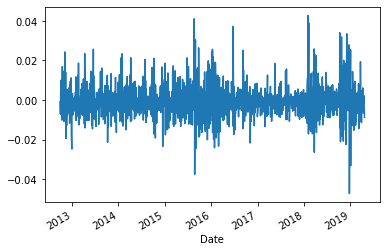

In [166]:
# Plot the S&P 500 daily returns.
sp500_daily_returns = new_sp500_df['Close'].pct_change()
sp500_daily_returns.plot()

In [167]:
# View a sample of the data for Whale Returns. 
whale_path = pd.read_csv('/Users/erahm/Downloads/whale_returns.csv')
whale_path.sample(5)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
677,10/20/2017,0.002271,-0.000603,0.004499,0.002820
617,7/27/2017,0.007939,-0.004955,0.005855,-0.007491
109,8/4/2015,0.001342,-0.010218,0.000684,-0.003354
897,9/6/2018,-0.008370,-0.004373,-0.002911,-0.003522
803,4/24/2018,-0.010467,-0.002791,-0.015645,-0.011289


In [168]:
# View the data types for each column for Whale Returns.
whale_path = pd.read_csv('/Users/erahm/Downloads/whale_returns.csv')
whale_path.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO INC               float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [169]:
# Count the number of rows in each column for Whale Returns.
whale_path = pd.read_csv('/Users/erahm/Downloads/whale_returns.csv')
whale_path.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO INC               1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [170]:
# Detect missing values by column and row for Whale Returns.
whale_path = pd.read_csv('/Users/erahm/Downloads/whale_returns.csv')
whale_path.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [171]:
# Determine the percentage of nulls by column for Whale Returns.
whale_path = pd.read_csv('/Users/erahm/Downloads/whale_returns.csv')
whale_path.isnull().mean() * 100

Date                           0.00000
SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO INC               0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [172]:
# Find the total sum of nulls by column for Whale Returns.
whale_path = pd.read_csv('/Users/erahm/Downloads/whale_returns.csv')
whale_path.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO INC               1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [173]:
 # Check for the number of duplicates. 
whale_path = whale_path
whale_path.duplicated().sum()

0

In [174]:
# Create new dataframe.
new_whale_df = whale_path[['Date', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO INC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']].copy()
new_whale_df['SOROS FUND MANAGEMENT LLC'] = new_whale_df['SOROS FUND MANAGEMENT LLC'].astype(float, errors = 'raise')
new_whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,3/2/2015,NaN,NaN,NaN,NaN
1,3/3/2015,-0.001266,-0.004981,-0.000496,-0.006569
2,3/4/2015,0.002230,0.003241,-0.002534,0.004213
3,3/5/2015,0.004016,0.004076,0.002355,0.006726
4,3/6/2015,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,4/25/2019,-0.000285,-0.001291,-0.005153,0.004848
1056,4/26/2019,0.008149,0.009162,0.012355,0.010434
1057,4/29/2019,0.001254,0.002719,0.006251,0.005223
1058,4/30/2019,-0.001295,-0.002211,-0.000259,-0.003702


In [175]:
 # Cleanse nulls from DataFrame by filling null data with the default value "0.00." Based on our previous isnull().sum() function, we see that there are
 # null values in all columns that need to be filled.  Given that we will be creating a combined dataframe across multiple data sources, we will leave the null 
 # values in place so that we can analyze all available data in the analysis. 
new_whale_df["SOROS FUND MANAGEMENT LLC"] = new_whale_df["SOROS FUND MANAGEMENT LLC"].fillna("0.00")
new_whale_df["PAULSON & CO INC"] = new_whale_df["PAULSON & CO INC"].fillna("0.00")
new_whale_df["TIGER GLOBAL MANAGEMENT LLC"] = new_whale_df["TIGER GLOBAL MANAGEMENT LLC"].fillna("0.00")
new_whale_df["BERKSHIRE HATHAWAY INC"] = new_whale_df["BERKSHIRE HATHAWAY INC"].fillna("0.00")
new_whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,3/2/2015,0.00,0.00,0.00,0.00
1,3/3/2015,-0.001266,-0.004981,-0.000496,-0.006569
2,3/4/2015,0.00223,0.003241,-0.002534,0.004213
3,3/5/2015,0.004016,0.004076,0.002355,0.006726
4,3/6/2015,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,4/25/2019,-0.000285,-0.001291,-0.005153,0.004848
1056,4/26/2019,0.008149,0.009162,0.012355,0.010434
1057,4/29/2019,0.001254,0.002719,0.006251,0.005223
1058,4/30/2019,-0.001295,-0.002211,-0.000259,-0.003702


In [176]:
# Convert the 'Date' column from 'Object' to 'DateTime'.
new_whale_df['Date'] = pd.to_datetime(new_whale_df['Date'])
print(new_whale_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1060 non-null   datetime64[ns]
 1   SOROS FUND MANAGEMENT LLC    1060 non-null   object        
 2   PAULSON & CO INC             1060 non-null   object        
 3   TIGER GLOBAL MANAGEMENT LLC  1060 non-null   object        
 4   BERKSHIRE HATHAWAY INC       1060 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 41.5+ KB
None


In [179]:
# Convert the 'Algo 2' columns to 'Float'.
new_whale_df['SOROS FUND MANAGEMENT LLC'] = new_whale_df['SOROS FUND MANAGEMENT LLC'].astype(float, errors = 'raise')
new_whale_df['PAULSON & CO INC'] = new_whale_df['PAULSON & CO INC'].astype(float, errors = 'raise')
new_whale_df['TIGER GLOBAL MANAGEMENT LLC'] = new_whale_df['TIGER GLOBAL MANAGEMENT LLC'].astype(float, errors = 'raise')
new_whale_df['BERKSHIRE HATHAWAY INC'] = new_whale_df['BERKSHIRE HATHAWAY INC'].astype(float, errors = 'raise')
print(new_whale_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1060 non-null   datetime64[ns]
 1   SOROS FUND MANAGEMENT LLC    1060 non-null   float64       
 2   PAULSON & CO INC             1060 non-null   float64       
 3   TIGER GLOBAL MANAGEMENT LLC  1060 non-null   float64       
 4   BERKSHIRE HATHAWAY INC       1060 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 49.7 KB
None


In [184]:
# Create DateTimeIndex.
new_whale_df.set_index(pd.to_datetime(new_whale_df['Date'], infer_datetime_format=True), inplace=True)
new_whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,0.000000,0.000000,0.000000,0.000000
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [185]:
# Sort date index in ascending order and drop the extra 'Date' column with the drop function.
new_whale_df.sort_index(ascending=True).drop(['Date'], axis=1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [186]:
 # Concat daily stock data using columns axis and inner join.
combined_stock_data = pd.concat([new_algo_df, new_sp500_df, new_whale_df], axis='columns', join='inner')
combined_stock_data.sort_index(ascending=True)
combined_stock_data

,Date,Algo 1,Algo 2,Date,Close,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,,,
2015-03-02,2015-03-02,-0.008158,0.003200,2015-03-02,2117.39,2015-03-02,0.000000,0.000000,0.000000,0.000000
2015-03-03,2015-03-03,-0.001942,-0.000949,2015-03-03,2107.78,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,-0.008589,0.002416,2015-03-04,2098.53,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,-0.000955,0.004323,2015-03-05,2101.04,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.004957,-0.011460,2015-03-06,2071.26,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,2019-04-16,-0.006945,0.002899,2019-04-16,2907.06,2019-04-16,0.002699,0.000388,-0.000831,0.000837
2019-04-17,2019-04-17,-0.010301,-0.005228,2019-04-17,2900.45,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,2019-04-18,-0.000588,-0.001229,2019-04-18,2905.03,2019-04-18,0.001448,0.001222,0.000582,0.001916


In [187]:
# Rename columns in dataframe.
combined_stock_data.rename({'Close': 'S&P 500', 'SOROS FUND MANAGEMENT LLC': 'SFM', 'PAULSON & CO INC': 'PCI', 'TIGER GLOBAL MANAGEMENT LLC': 'TGM', 'BERKSHIRE HATHAWAY INC': 'BHI'}, axis=1, inplace=True)
combined_stock_data

,Date,Algo 1,Algo 2,Date,S&P 500,Date,SFM,PCI,TGM,BHI
Date,,,,,,,,,,
2015-03-02,2015-03-02,-0.008158,0.003200,2015-03-02,2117.39,2015-03-02,0.000000,0.000000,0.000000,0.000000
2015-03-03,2015-03-03,-0.001942,-0.000949,2015-03-03,2107.78,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,-0.008589,0.002416,2015-03-04,2098.53,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,-0.000955,0.004323,2015-03-05,2101.04,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.004957,-0.011460,2015-03-06,2071.26,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,2019-04-16,-0.006945,0.002899,2019-04-16,2907.06,2019-04-16,0.002699,0.000388,-0.000831,0.000837
2019-04-17,2019-04-17,-0.010301,-0.005228,2019-04-17,2900.45,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,2019-04-18,-0.000588,-0.001229,2019-04-18,2905.03,2019-04-18,0.001448,0.001222,0.000582,0.001916


In [188]:
# View existing data types for each column.
print(combined_stock_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1044 entries, 2015-03-02 to 2019-04-23
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1044 non-null   datetime64[ns]
 1   Algo 1   1044 non-null   float64       
 2   Algo 2   1044 non-null   float64       
 3   Date     1044 non-null   datetime64[ns]
 4   S&P 500  1044 non-null   float64       
 5   Date     1044 non-null   datetime64[ns]
 6   SFM      1044 non-null   float64       
 7   PCI      1044 non-null   float64       
 8   TGM      1044 non-null   float64       
 9   BHI      1044 non-null   float64       
dtypes: datetime64[ns](3), float64(7)
memory usage: 89.7 KB
None


In [189]:
# Create new dataframe for all portfolios.
new_combined_stock_data = combined_stock_data[['Algo 1', 'Algo 2', 'S&P 500', 'SFM', 'PCI', 'TGM', 'BHI']].copy()
new_combined_stock_data

,Algo 1,Algo 2,S&P 500,SFM,PCI,TGM,BHI
Date,,,,,,,
2015-03-02,-0.008158,0.003200,2117.39,0.000000,0.000000,0.000000,0.000000
2015-03-03,-0.001942,-0.000949,2107.78,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,2098.53,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,2101.04,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,2071.26,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...,...,...
2019-04-16,-0.006945,0.002899,2907.06,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.010301,-0.005228,2900.45,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,-0.000588,-0.001229,2905.03,0.001448,0.001222,0.000582,0.001916


In [190]:
# View existing data types for each column in dataframe.
print(new_combined_stock_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1044 entries, 2015-03-02 to 2019-04-23
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Algo 1   1044 non-null   float64
 1   Algo 2   1044 non-null   float64
 2   S&P 500  1044 non-null   float64
 3   SFM      1044 non-null   float64
 4   PCI      1044 non-null   float64
 5   TGM      1044 non-null   float64
 6   BHI      1044 non-null   float64
dtypes: float64(7)
memory usage: 65.2 KB
None


In [191]:
# Calculate daily returns across all porfolios.
df = new_combined_stock_data
new_combined_stock_data.pct_change(periods=36, fill_method='pad', limit=None, freq=None)

,Algo 1,Algo 2,S&P 500,SFM,PCI,TGM,BHI
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,-1.706200,-3.996312,0.039680,-2.203837,-1.106654,-0.912762,-0.843846
2019-04-17,-3.014886,1.519182,0.038137,-0.519632,0.057136,-0.745030,-2.992277
2019-04-18,-1.484122,-3.445850,0.040342,-1.387295,-1.090067,-1.041041,-0.745599


In [208]:
# Replace 'NaN' values with '0.0' and calculate daily returns.
combined_daily_returns = df.pct_change().fillna(0)
combined_daily_returns

,Algo 1,Algo 2,S&P 500,SFM,PCI,TGM,BHI
Date,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-03-03,-0.761929,-1.296713,-0.004539,-inf,-inf,-inf,-inf
2015-03-04,3.422374,-3.544766,-0.004389,-2.762069,-1.650792,4.113650,-1.641381
2015-03-05,-0.888803,0.789231,0.001196,0.800968,0.257544,-1.929234,0.596558
2015-03-06,4.190043,-3.650914,-0.014174,-2.968464,-1.876837,-4.601872,-2.947282
...,...,...,...,...,...,...,...
2019-04-16,0.603391,-1.634218,0.000509,-2.898341,-1.335693,-3.088323,-1.079744
2019-04-17,0.483294,-2.803170,-0.002274,-2.073108,-17.661086,4.306534,2.851035
2019-04-18,-0.942926,-0.764890,0.001579,-1.499843,-1.188925,-1.131886,-0.405345


In [212]:
# Calculate the cumulative returns using the 'cumprod()' function.
cumulative_returns = (1 + combined_daily_returns).cumprod() - 1
cumulative_returns

,Algo 1,Algo 2,S&P 500,SFM,PCI,TGM,BHI
Date,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2015-03-03,-0.761929,-1.296713,-0.004539,-inf,-inf,-inf,-inf
2015-03-04,0.052838,-0.244935,-0.008907,inf,inf,-inf,inf
2015-03-05,-0.882928,0.350985,-0.007722,inf,inf,inf,inf
2015-03-06,-0.392390,-4.581344,-0.021786,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...
2019-04-16,-0.148701,-0.093932,0.372945,NaN,NaN,NaN,NaN
2019-04-17,0.262726,-2.633796,0.369823,NaN,NaN,NaN,NaN
2019-04-18,-0.927932,-1.384122,0.371986,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

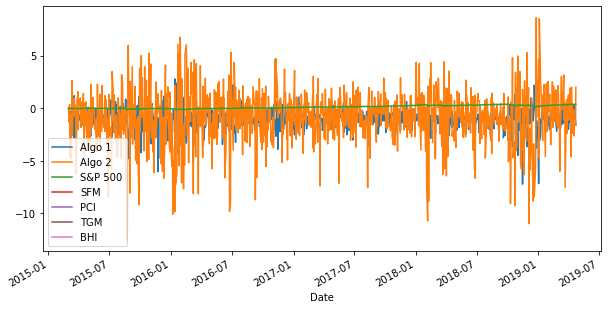

In [214]:
# Plot the cumulative daily returns across all portfolios on a monthly basis.
%matplotlib inline
cumulative_returns.plot(figsize=(10,5))

In [217]:
 # Calculate daily standard deviations across all portfolios.
daily_std = cumulative_returns.std()
daily_std.head()

Algo 1     0.934255
Algo 2     2.605861
S&P 500    0.144429
SFM             NaN
PCI             NaN
dtype: float64

<AxesSubplot:>

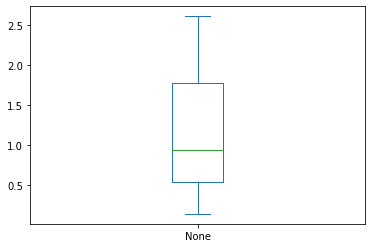

In [220]:
 # Plot box plot for daily standard deviation across all portfolios.
daily_std.plot.box()

In [218]:
 # Calculate annualized standard deviation across all portfolios.
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

Algo 1     14.830843
Algo 2     41.366753
S&P 500     2.292740
SFM              NaN
PCI              NaN
dtype: float64

<AxesSubplot:>

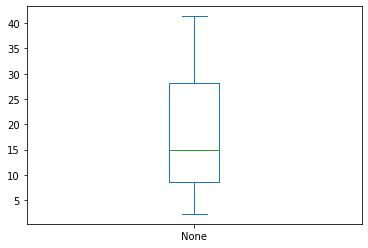

In [221]:
 # Plot box plot for daily standard deviation across all portfolios.
annualized_std.plot.box()

In [224]:
 # Calculate sharpe ratios.
sharpe_ratios = (cumulative_returns.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratios.head()

Algo 1    -18.352446
Algo 2     -5.584920
S&P 500    13.566894
SFM              NaN
PCI              NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

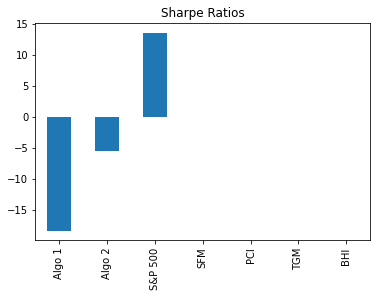

In [225]:
# Plot sharpe ratios.
sharpe_ratios.plot.bar(title='Sharpe Ratios')